In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#df = pd.read_csv('final.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [ ]:
X = df.iloc[:,:]
X

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [ ]:
import seaborn as sns
import missingno as msn

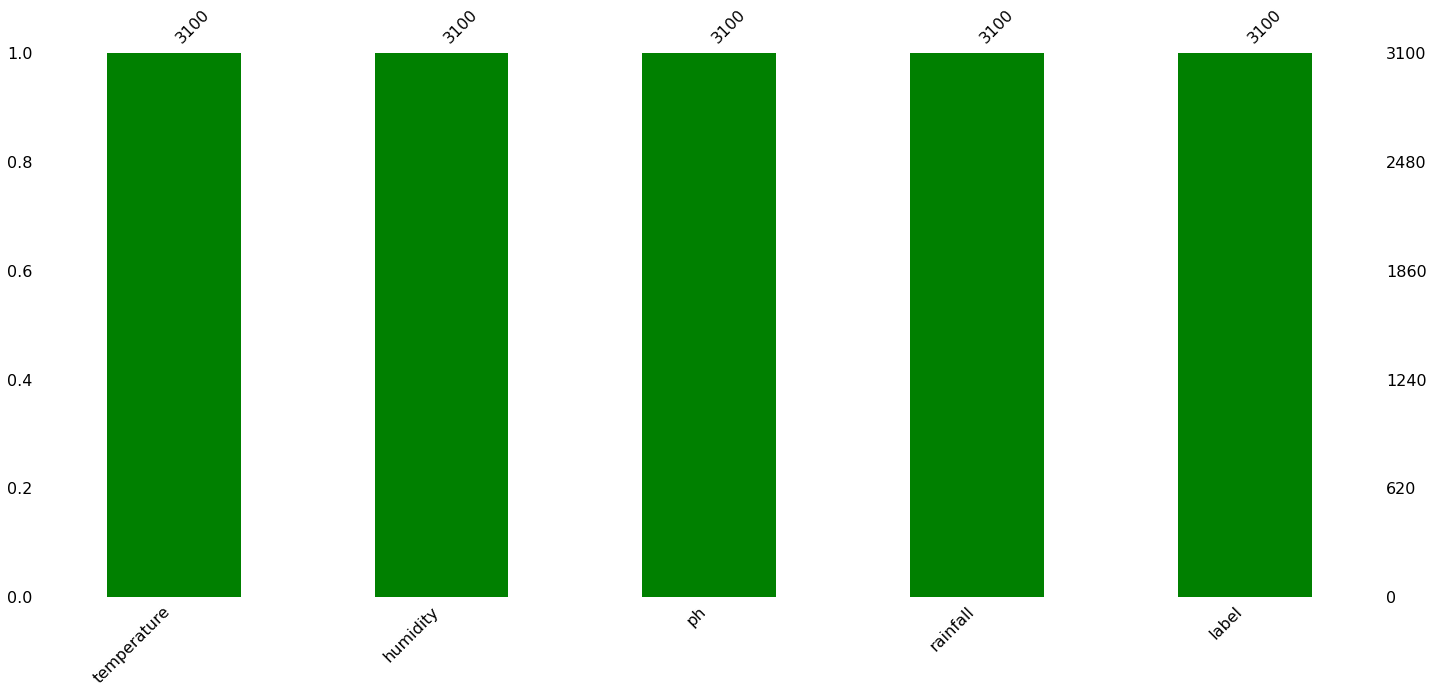

In [ ]:
#Check Missing Values
msn.bar(X,color='green')

In [ ]:
#Handle Missing Values
# from sklearn.impute import SimpleImputer
# mean_imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
# mean_imputer.fit_transform((df['Age'].values).reshape(1,-1))

In [ ]:
#X=X.reset_index()
X

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


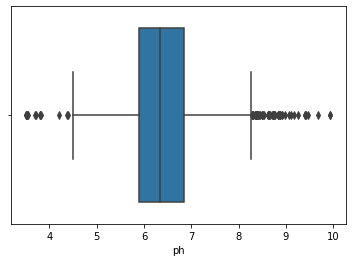

In [ ]:
  #Detect and handle Outliers using ZScore
import seaborn as sns
from scipy import stats

sns.boxplot(x=X.iloc[:,2])
z = np.abs(stats.zscore(X.iloc[:,2]))   #Do for PH
cols = np.where(z > 2.2)
X.drop(index=cols[0],inplace=True)

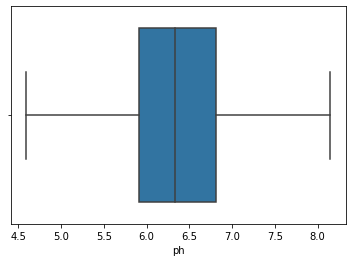

In [ ]:
sns.boxplot(x=X.iloc[:,2])

In [ ]:
temp1 = X.reset_index()
temp1

,index,temperature,humidity,ph,rainfall,label
0,0,20.879744,82.002744,6.502985,202.935536,rice
1,1,21.770462,80.319644,7.038096,226.655537,rice
2,2,23.004459,82.320763,7.840207,263.964248,rice
3,3,26.491096,80.158363,6.980401,242.864034,rice
4,4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...
2981,3095,25.287846,89.636679,6.765095,58.286977,watermelon
2982,3096,26.638386,84.695469,6.189214,48.324286,watermelon
2983,3097,25.331045,84.305338,6.904242,41.532187,watermelon
2984,3098,26.897502,83.892415,6.463271,43.971937,watermelon


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'rice'),
 Text(0, 0, 'wheat'),
 Text(0, 0, 'Mung Bean'),
 Text(0, 0, 'Tea'),
 Text(0, 0, 'millet'),
 Text(0, 0, 'maize'),
 Text(0, 0, 'Lentil'),
 Text(0, 0, 'Jute'),
 Text(0, 0, 'Coffee'),
 Text(0, 0, 'Cotton'),
 Text(0, 0, 'Ground Nut'),
 Text(0, 0, 'Peas'),
 Text(0, 0, 'Rubber'),
 Text(0, 0, 'Sugarcane'),
 Text(0, 0, 'Tobacco'),
 Text(0, 0, 'Kidney Beans'),
 Text(0, 0, 'Moth Beans'),
 Text(0, 0, 'Coconut'),
 Text(0, 0, 'Black gram'),
 Text(0, 0, 'Adzuki Beans'),
 Text(0, 0, 'Pigeon Peas'),
 Text(0, 0, 'Chickpea'),
 Text(0, 0, 'banana'),
 Text(0, 0, 'grapes'),
 Text(0, 0, 'apple'),
 Text(0, 0, 'mango'),
 Text(0, 0, 'muskmelon'),
 Text(0, 0, 'orange'),
 Text(0, 0, 'papaya'),
 Text(0, 0, 'pomegranate'),
 Text(0, 0, 'watermelon')]

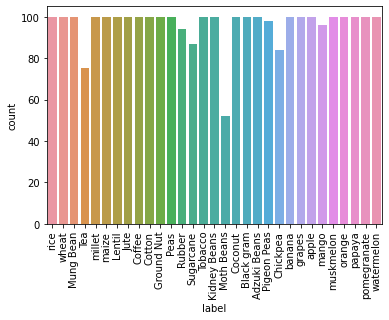

In [ ]:
chart = sns.countplot(temp1.iloc[:,-1],data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [ ]:
X = temp1
X.shape

(2986, 6)

In [ ]:
X.drop(columns=['index'],inplace=True)

In [ ]:
X

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
2981,25.287846,89.636679,6.765095,58.286977,watermelon
2982,26.638386,84.695469,6.189214,48.324286,watermelon
2983,25.331045,84.305338,6.904242,41.532187,watermelon
2984,26.897502,83.892415,6.463271,43.971937,watermelon


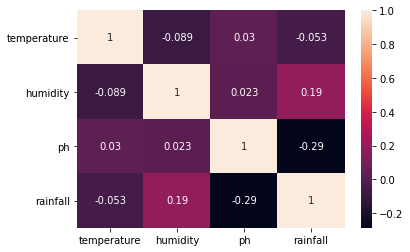

In [ ]:
#Check correlation maong features
sns.heatmap(X.corr(),annot=True)

In [ ]:
newX = X.iloc[:,0:4]
newX

,temperature,humidity,ph,rainfall
0,20.879744,82.002744,6.502985,202.935536
1,21.770462,80.319644,7.038096,226.655537
2,23.004459,82.320763,7.840207,263.964248
3,26.491096,80.158363,6.980401,242.864034
4,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...
2981,25.287846,89.636679,6.765095,58.286977
2982,26.638386,84.695469,6.189214,48.324286
2983,25.331045,84.305338,6.904242,41.532187
2984,26.897502,83.892415,6.463271,43.971937


In [ ]:
#Scale Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(newX)

In [ ]:
Y = X.iloc[:,4]
Y

0             rice
1             rice
2             rice
3             rice
4             rice
           ...    
2981    watermelon
2982    watermelon
2983    watermelon
2984    watermelon
2985    watermelon
Name: label, Length: 2986, dtype: object

In [ ]:
for i in range(len(Y)):
  Y[i] = Y[i].lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.preprocessing import OneHotEncoder
newY = pd.get_dummies(Y).iloc[: , 0:]
newY

,adzuki beans,apple,banana,black gram,chickpea,coconut,coffee,cotton,grapes,ground nut,jute,kidney beans,lentil,maize,mango,millet,moth beans,mung bean,muskmelon,orange,papaya,peas,pigeon peas,pomegranate,rice,rubber,sugarcane,tea,tobacco,watermelon,wheat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
crops=['wheat','mungbean','tea','millet','rice','maize','lentil','jute','cofee','cotton','ground nut','peas','rubber','sugarcane','tobacco','kidney beans','moth beans','coconut','blackgram','adzuki beans','pigeon peas','chick peas','banana','grapes','apple','mango','muskmelon','orange','papaya','watermelon','pomegranate']
crops.sort()

# one hot

In [ ]:
data= pd.concat([X,newY],axis=1)
data.head()

,temperature,humidity,ph,rainfall,label,adzuki beans,apple,banana,black gram,chickpea,coconut,coffee,cotton,grapes,ground nut,jute,kidney beans,lentil,maize,mango,millet,moth beans,mung bean,muskmelon,orange,papaya,peas,pigeon peas,pomegranate,rice,rubber,sugarcane,tea,tobacco,watermelon,wheat
0,20.879744,82.002744,6.502985,202.935536,rice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,21.770462,80.319644,7.038096,226.655537,rice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,23.004459,82.320763,7.840207,263.964248,rice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.491096,80.158363,6.980401,242.864034,rice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,20.130175,81.604873,7.628473,262.717340,rice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
data.drop('label', axis=1,inplace=True)

In [ ]:
data

,temperature,humidity,ph,rainfall,adzuki beans,apple,banana,black gram,chickpea,coconut,coffee,cotton,grapes,ground nut,jute,kidney beans,lentil,maize,mango,millet,moth beans,mung bean,muskmelon,orange,papaya,peas,pigeon peas,pomegranate,rice,rubber,sugarcane,tea,tobacco,watermelon,wheat
0,20.879744,82.002744,6.502985,202.935536,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,21.770462,80.319644,7.038096,226.655537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,23.004459,82.320763,7.840207,263.964248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.491096,80.158363,6.980401,242.864034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,20.130175,81.604873,7.628473,262.717340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,25.287846,89.636679,6.765095,58.286977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2982,26.638386,84.695469,6.189214,48.324286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2983,25.331045,84.305338,6.904242,41.532187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2984,26.897502,83.892415,6.463271,43.971937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
train=data.iloc[:, 0:4].values
test=data.iloc[: ,4:].values


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train = sc.fit_transform(train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train,test,random_state=42)

In [ ]:
for  i in range(50,1000,50):
 clf4=RandomForestClassifier(n_estimators=i)
 clf4.fit(X_train,Y_train)
 print("Score of ",i,clf4.score(X_test,Y_test))

In [ ]:
for  i in range(50,1000,50):
 clf4=RandomForestClassifier(n_estimators=i,criterion='entropy')
 clf4.fit(X_train,Y_train)
 print("Score of ",i,clf4.score(X_test,Y_test))

Score of  50 0.9129852744310576
Score of  100 0.9129852744310576
Score of  150 0.9183400267737617
Score of  200 0.9143239625167336
Score of  250 0.9210174029451138
Score of  300 0.9143239625167336
Score of  350 0.9156626506024096
Score of  400 0.9183400267737617
Score of  450 0.9183400267737617
Score of  500 0.9143239625167336
Score of  550 0.9196787148594378
Score of  600 0.9196787148594378
Score of  650 0.9183400267737617
Score of  700 0.9236947791164659
Score of  750 0.9223560910307899
Score of  800 0.9183400267737617
Score of  850 0.9183400267737617
Score of  900 0.9196787148594378
Score of  950 0.9196787148594378


In [ ]:
clf5=RandomForestClassifier(n_estimators=400,criterion='entropy')
clf5.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf5.score(X_test,Y_test)

0.9183400267737617

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
pred2=clf5.predict(X_test)

In [ ]:
cropPredictor(pred2=clf5.predict(q))

In [ ]:
pred2=clf5.predict(q)
pred2.shape

(1, 31)

In [ ]:
#SCORE OF RANDOMFOREST
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score,classification_report

results2=multilabel_confusion_matrix(Y_test,pred2)
print('Confusion Matrix :')
print(results2) 
print ('Accuracy Score :',accuracy_score(Y_test, pred2) )
print ('Report : ')
print(classification_report(Y_test, pred2))

In [ ]:
def cropPredictor(p):
    for i in range(0,31):
        if(p[0][i]==1):
            c=crops[i]
            break
    print('The predicted crop is %s'%c)

In [ ]:
q=np.array([[100,20,8,500]])
q

array([[100,  20,   8, 500]])

In [ ]:
import pickle

pickle.dump(clf5, open('testModel2.pkl','wb'))
model = pickle.load(open('testModel2.pkl','rb'))


In [ ]:
prediction

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
prediction=model.predict(q)
cropPredictor(prediction)

UnboundLocalError: ignored

# Label Encoder

In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
label_ids=label_encoder.fit_transform(Y)
#print(crops)
print(label_ids)
print(Y)

[24 24 24 ... 29 29 29]
0             rice
1             rice
2             rice
3             rice
4             rice
           ...    
2981    watermelon
2982    watermelon
2983    watermelon
2984    watermelon
2985    watermelon
Name: label, Length: 2986, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()
#clf.fit(x_train,y_train)

In [ ]:
clf.score(x_train,y_train)

0.7641804376953998

In [ ]:
clf.score(x_test,y_test)

0.7282463186077643

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
clf2 = DecisionTreeClassifier()

In [ ]:
clf2.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf2.score(x_train,y_train)

1.0

In [ ]:
clf2.score(x_test,y_test)

0.8995983935742972

In [ ]:
from sklearn.svm import SVC
clf3 = SVC()

In [ ]:
clf3.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf3.score(x_test,y_test)

0.8313253012048193

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier()
#clf4.fit(x_train,y_train)

In [ ]:
clf4.score(x_test,y_test)

0.9424364123159303